In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import collections
import gensim
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

In [4]:
w2v_udb = gensim.models.KeyedVectors.load_word2vec_format(
    '../data/GoogleNews-vectors-negative300.bin', binary=True
)
w2v_db = gensim.models.KeyedVectors.load_word2vec_format(
    '../data/GoogleNews-vectors-negative300-hard-debiased.bin', binary=True
)

In [ ]:
# text_classificationの前処理
for word in text.split():
    if word[-1] in [',', '.']:
        word = word[:-1]
    if word in w2v_model.key_to_index:
        get_embedding

In [4]:
# 1行目がcolumnになっちゃってたから直す
def refine_csv(path, lst):
    df = pd.read_csv(path)
    df = df.T
    df.insert(0, '-1', lst)
    df = df.T
    df.columns = range(101)
    df.to_csv(path, index=False)
# predの結果がaccの結果と合うか確認
def check_acc(df):
    return (df.T == df[df.columns[-1]]).T.sum()/len(df)

In [10]:
# dfのexp_id目の実験結果の混合行列を出力
def get_ConfusionMatrix(df, exp_id):
    return confusion_matrix(df[exp_id], df[df.columns[-1]])

In [11]:
# exp_id目の実験の誤分類したデータのベン図を出力
def get_VennDiagram(df_udb, df_db, exp_id):
    def get_MissClassified_id(df, exp_id):
        return df[df[exp_id] != df[df.columns[-1]]].index
    udb_ms = get_MissClassified_id(df_udb, exp_id)
    db_ms = get_MissClassified_id(df_db, exp_id)
    intersection = set(udb_ms) & set(db_ms)
    udb_only = set(udb_ms) - intersection
    db_only = set(db_ms) - intersection
    return intersection, udb_only, db_only

# AG_NEWS
ラベル：World (0), Sports (1), Business (2), Sci/Tech (3)

In [5]:
df_udb = pd.read_csv('../outputs/AGNEWS_20210610_pred_udb.csv')
df_udb

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7596,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7597,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7598,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [6]:
df_db = pd.read_csv('../outputs/AGNEWS_20210610_pred_db.csv')
df_db

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,100
0,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
1,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
2,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7595,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7596,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7597,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
7598,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [7]:
with open('../outputs/AGNEWS_20210610_txtLst.txt', encoding='utf-8') as f:
    text_list = f.read().split('\n\n\n')

In [12]:
get_ConfusionMatrix(df_udb, '0')

array([[1696,   18,   64,   51],
       [  54, 1856,   11,   10],
       [  95,   16, 1627,  132],
       [  55,   10,  198, 1707]], dtype=int64)

In [13]:
get_ConfusionMatrix(df_db, '0')

array([[1662,   22,   61,   41],
       [  69, 1854,   13,   10],
       [ 108,   15, 1611,  153],
       [  61,    9,  215, 1696]], dtype=int64)

In [14]:
intersec, udb_only, db_only = get_VennDiagram(df_udb, df_db, '0')

In [15]:
print('両方間違い：', len(intersec))
print('udbのみ間違い：', len(udb_only))
print('dbのみ間違い：', len(db_only))

両方間違い： 656
udbのみ間違い： 58
dbのみ間違い： 121


In [16]:
for i in db_only:
    print('id-{}: 正解ラベル-{}, 分類結果-{}'.format(i, df_db['0'][i], df_db['100'][i]))
    print(text_list[i])
    break

id-1031: 正解ラベル-2, 分類結果-3
Aether Declines Higher Bid for Unit (washingtonpost.com) washingtonpost.com - Aether Systems Inc., a Maryland wireless data company that is selling off its operating units, said yesterday it received a  #36;30 million offer for a division it had already agreed to sell to another buyer for  #36;25 million.


## 間違いやすい単語群の分散表現の差を見る
例)worldをsportと分類してしまったもの

In [8]:
# trueをpredictedとして分類されているテキストのIDとその回数を出力
def count_numMC(true, predicted, df):
    df = df[df['100'] == true]
    lst = []
    for i in range(100):
        idxs = df[df[str(i)] == 1][str(i)].index
        lst += list(idxs)
    return collections.Counter(lst)

In [9]:
# 閾値より大きいvalueのkeyを出力
def get_keys(counter, threshold):
    return [k for k,v in counter.items() if v > threshold]

In [10]:
# counter1>counter2のキーとその差を出力, ignore以下の差は無視する
def get_worseID(counter1, counter2, ignore):
    dic = {}
    for k in counter1.keys():
        diff = counter1[k] - counter2[k]
        if diff > ignore:
            dic[k] = diff
    return sorted(dic.items(), key=lambda item: item[1], reverse=True)

In [11]:
def get_diff(text):
    result = {}
    for word in word_tokenize(text.lower()):
        if word in w2v_udb.key_to_index and word in w2v_db.key_to_index:
            ms_diff = ((w2v_udb[word] - w2v_db[word])**2).mean()
            abs_diff = np.abs(w2v_udb[word] - w2v_db[word])
            diff = w2v_udb[word] - w2v_db[word]
        elif word in w2v_udb.key_to_index and not word in w2v_db.key_to_index:
            word += '(undebiased only)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        elif not word in w2v_udb.key_to_index and word in w2v_db.key_to_index:
            word += '(debiased only)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        else:
            word += '(neither)'
            ms_diff = 0
            abs_diff = np.zeros(300)
            diff = np.zeros(300)
        result[word] = (ms_diff, abs_diff, diff)
    result = sorted(result.items(), key=lambda x:x[1][0], reverse=True)
    return result

In [32]:
# 文章の単語の分散表現の和でsortした
def show(idx, top, sort=False):
    print(text_list[idx])
    print(df_udb[idx:idx+1].values)
    print(df_db[idx:idx+1].values)
    diff = get_diff(text_list[idx])
    for i in diff:
        print(i[0], i[1][0])
    if sort:
        idx = np.argsort(np.stack([i[1][2] for i in diff]).sum(axis=0))
    for i in diff[:top]:
        fig = plt.figure(figsize=(15,4))
        ax1 = fig.add_subplot(1, 2, 2)
        if sort:
            y1 = i[1][2][idx]
        else:
            y1 = i[1][2]
        ax1.bar(range(1, 301), y1)
        ax1.plot(range(1, 301), [0]*300, color='black')
        ax2 = fig.add_subplot(1, 2, 1, sharey=ax1)
        if sort:
            y2 = i[1][1][idx]
        else:
            y2 = i[1][1]
        ax2.bar(range(1, 301), y2)
        ax2.plot(range(1, 301), [0]*300, color='black')
        fig.suptitle(i[0])
        plt.show()

Jackson Squares Off With Prosecutor SANTA MARIA, Calif. - Fans of Michael Jackson erupted in cheers Monday as the pop star emerged from a double-decker tour bus and went into court for a showdown with the prosecutor who has pursued him for years on child molestation charges...
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
molestation 0.027930915
michael 0.026814124
prosecutor 0.023204891
santa 0.02181359
jackson 0.021351824
showdown 0.019103695
cheers 0.018137226
maria 0.017049177
erupted 0.015490265
tour 0.014311977
fans 0.013820238
bus 0.01318749
squares 0.01290735
charges 0.012269505
monday 0.012175984
pursued 0.010

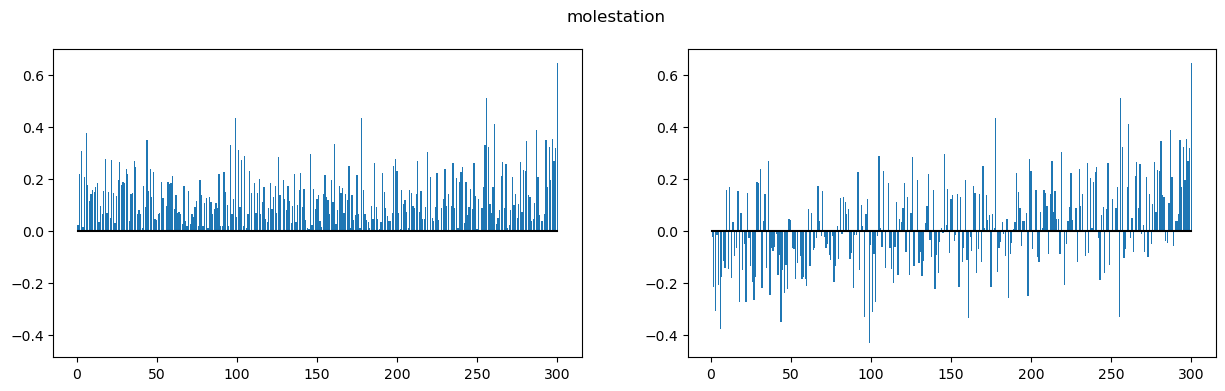

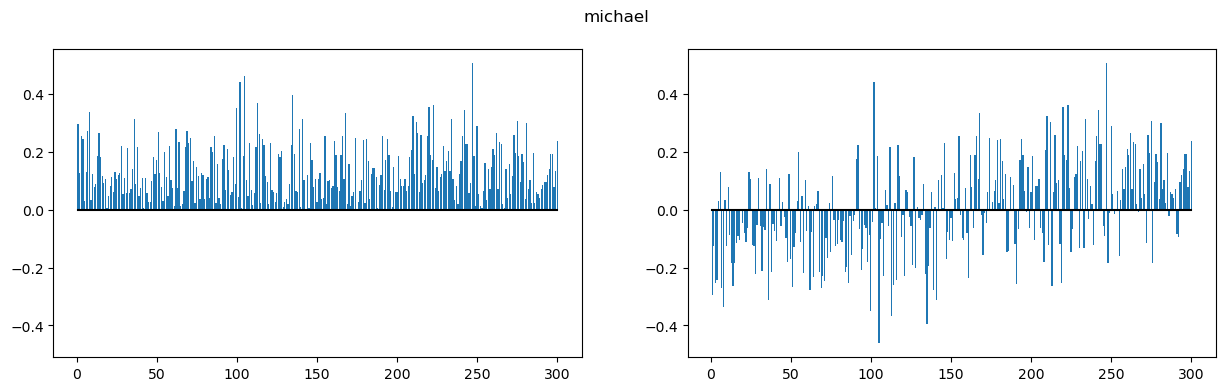

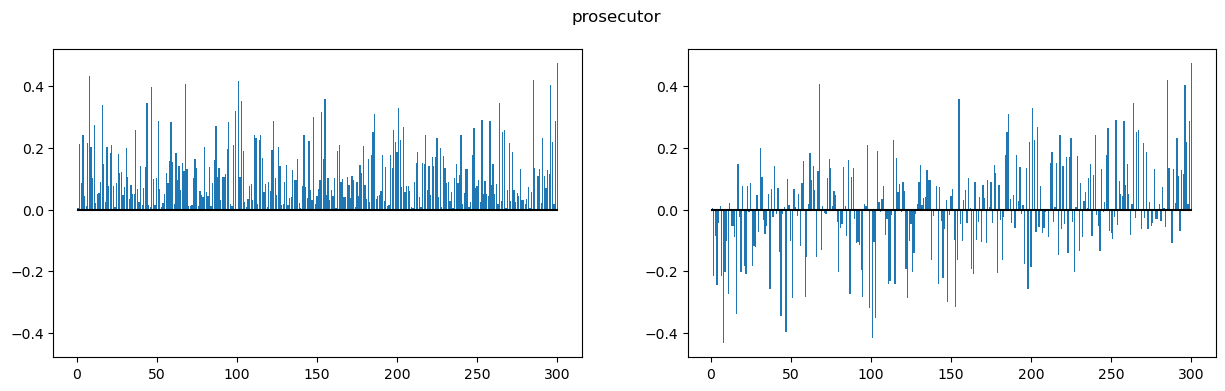

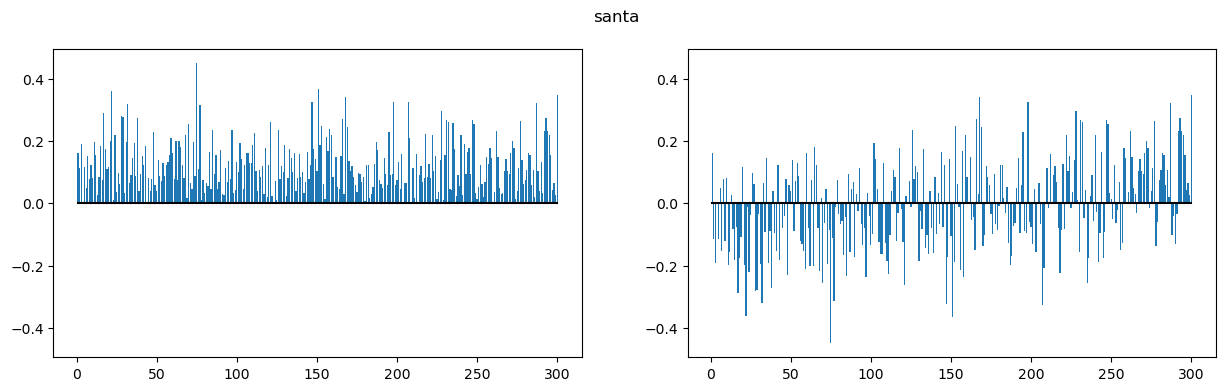

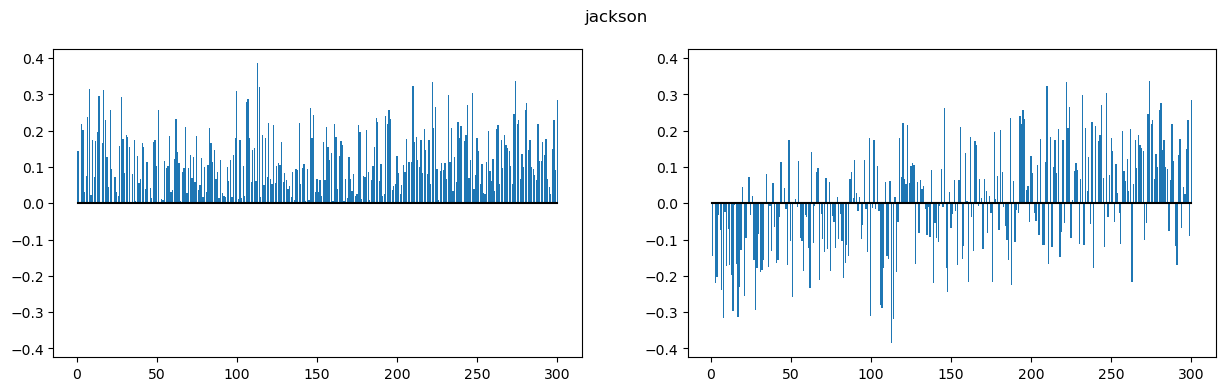

In [33]:
show(67, 5, sort=True)

In [26]:
c_db = count_numMC(0, 1, df_db)
c_udb = count_numMC(0, 1, df_udb)
print(sorted(set(c_db.values())))
print(sorted(set(c_udb.values())))

[1, 2, 3, 5, 8, 10, 15, 16, 20, 26, 27, 29, 30, 33, 38, 42, 46, 51, 62, 66, 69, 74, 77, 98, 99, 100]
[1, 2, 3, 4, 5, 8, 15, 20, 26, 36, 58, 100]


In [27]:
threshold = 70 # 何回間違えてたらだめかの閾値
print(get_keys(c_db, threshold))
print(get_keys(c_udb, threshold))

[67, 79, 88, 348, 355, 369, 372, 450, 584, 613, 614, 626, 676, 747, 833, 896, 967, 1080, 1466, 1533, 1617, 1866, 1976, 2028, 2468, 2591, 2656, 2738, 3063, 3186, 3563, 3570, 3657, 3661, 3688, 3746, 3805, 3899, 3900, 4027, 4029, 4549, 4669, 4734, 4900, 5128, 5384, 5892, 5941, 6089, 6093, 6150, 7077, 7238, 7467]
[79, 88, 348, 355, 369, 372, 450, 584, 613, 614, 626, 676, 747, 833, 896, 967, 1080, 1466, 1533, 1617, 1976, 2028, 2468, 2591, 2656, 2738, 2758, 3063, 3186, 3563, 3570, 3661, 3688, 3746, 3805, 3899, 3900, 4027, 4029, 4088, 4549, 4669, 4734, 4900, 5128, 5384, 5892, 5941, 6089, 6093, 6150, 7077, 7238]


In [28]:
get_worseID(c_db, c_udb, 3)

[(67, 98),
 (1866, 96),
 (7467, 77),
 (838, 65),
 (7471, 65),
 (6794, 62),
 (3657, 59),
 (893, 42),
 (650, 38),
 (6698, 30),
 (802, 29),
 (527, 28),
 (326, 27),
 (7459, 27),
 (4234, 26),
 (6218, 20),
 (87, 18),
 (1623, 15),
 (2290, 15),
 (511, 8),
 (3638, 7)]

In [29]:
show(1866, 1)

Schooling 'mix up' hits Portugal Schools across Portugal turn away pupils because of a teachers' assignment mix up on the first day of classes.
[[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
  1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0]]
pupils 0.022716828
hits 0.017422073
schooling 0.015280523
teachers 0.013949137
classes 0.011096788
assignment 0.011053146
schools 0.0110185
portugal 0.007861877
mix 0.006099549
away 0.00594945
across 0.005472597
turn 0.004038576
up 0.0038106998
day 0.0026670683
first 0.0021007461
because 0.0017617125
on 0.0012239025
the 7.330973e-05
'mix(neither) 0
'(neither) 0
of(neither) 0
a(neither) 0
.(neither) 0


In [30]:
get_worseID(c_udb, c_db, 3)

[(4088, 90), (2758, 84), (4302, 42), (3604, 6), (6145, 4)]

## SHAPを使ってみる

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from torchtext import data
from torchtext.datasets import AG_NEWS
import gensim
import numpy as np

def trans_text2vec(text, w2v_dim, w2v_model):
    x = torch.zeros(w2v_dim)
    count = 0
    for i, word in enumerate(text.split()):
        if word[-1] in [',', '.']:
            word = word[:-1]
        if word in w2v_model.key_to_index:
            x += w2v_model[word]
            count += 1
    if count > 0:
        x /= count
    return x

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.num_data = len(X)

    def __len__(self):
        return self.num_data

    def __getitem__(self, i):
        x = self.X[i]
        y = self.y[i]
        return x, y

class Classifier(nn.Module):
    def __init__(self, input_dim, hidden_dim1, hidden_dim2, num_class):
        super(Classifier, self).__init__()
        self.ln1 = nn.Linear(input_dim, hidden_dim1)
        self.ln2 = nn.Linear(hidden_dim1, hidden_dim2)
        self.ln3 = nn.Linear(hidden_dim2, num_class)
    
    def forward(self, x):
        x = self.ln1(x)
        x = F.relu(x)
        x = self.ln2(x)
        x = F.relu(x)
        x = self.ln3(x)
        return x

torch.manual_seed(0)
np.random.seed(0)
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

w2v_model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300.bin', binary=True)
#w2v_model = gensim.models.KeyedVectors.load_word2vec_format('../data/GoogleNews-vectors-negative300-hard-debiased.bin', binary=True)
w2v_dim = 300

train_set, test_set = AG_NEWS()
num_class = 4 # 1~4

batch_size = 1000
num_epoch = 100

C:\Users\gabriel\codes\python\NLP_Bias\notebooks\.data\AG_NEWS\train.csv: 29.5MB [00:01, 28.8MB/s]                                                                                       
C:\Users\gabriel\codes\python\NLP_Bias\notebooks\.data\AG_NEWS\test.csv: 1.86MB [00:00, 20.1MB/s]                                                                                        


In [5]:
X_train = torch.zeros(len(train_set), w2v_dim)
X_test = torch.zeros(len(test_set), w2v_dim)
y_train = torch.zeros(len(train_set), dtype=int)
y_test = torch.zeros(len(test_set), dtype=int)

text_list = []
for i, (label, text) in enumerate(train_set):
    X_train[i] += trans_text2vec(text, w2v_dim, w2v_model)
    y_train[i] += label - 1

for i, (label, text) in enumerate(test_set):
    X_test[i] += trans_text2vec(text, w2v_dim, w2v_model)
    y_test[i] += label - 1
    text_list.append(text)

train_set = MyDataset(X_train, y_train)
test_set = MyDataset(X_test, y_test)

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_set, batch_size=len(test_set))

In [8]:
model = Classifier(w2v_dim, 150, 50, num_class).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

train_loss_log = []
eval_loss_log = []
eval_acc_log = []
best_acc = 0
for epoch in range(num_epoch):
    model.train()
    train_loss = 0
    for X, y in train_loader:
        X, y = X.to(device), y.to(device)
        pred = model(X)
        loss = loss_fn(pred, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss
    train_loss /= len(train_loader)
    train_loss_log.append(train_loss.cpu().item())

    model.eval()
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            loss = loss_fn(pred, y)
            acc = (torch.max(pred, dim=1).indices == y).sum() / len(test_set)
    eval_loss_log.append(loss.cpu().item())
    eval_acc_log.append(acc.cpu().item())

    print('Epoch{}\tloss train:{:.4}, test:{:.4}\ttest acc:{:.4}'.format(epoch+1, train_loss, loss, acc))
    if acc > best_acc:
        best_acc = acc
        best_pred = pred
        best_model = model

print('max acc: Epoch {}, {:.4}'.format(eval_acc_log.index(best_acc)+1, best_acc))

Epoch1	loss train:1.385, test:1.382	test acc:0.4837
Epoch2	loss train:1.379, test:1.376	test acc:0.7142
Epoch3	loss train:1.371, test:1.365	test acc:0.7686
Epoch4	loss train:1.354, test:1.339	test acc:0.7759
Epoch5	loss train:1.31, test:1.269	test acc:0.7397
Epoch6	loss train:1.191, test:1.093	test acc:0.7376
Epoch7	loss train:0.9662, test:0.8336	test acc:0.792
Epoch8	loss train:0.7139, test:0.613	test acc:0.8328
Epoch9	loss train:0.5467, test:0.4965	test acc:0.8492
Epoch10	loss train:0.4605, test:0.4372	test acc:0.8599
Epoch11	loss train:0.4147, test:0.4045	test acc:0.8676
Epoch12	loss train:0.3879, test:0.3847	test acc:0.8745
Epoch13	loss train:0.3704, test:0.3715	test acc:0.8784
Epoch14	loss train:0.3579, test:0.3611	test acc:0.8826
Epoch15	loss train:0.3485, test:0.3539	test acc:0.8858
Epoch16	loss train:0.3411, test:0.3472	test acc:0.8882
Epoch17	loss train:0.3351, test:0.342	test acc:0.8901
Epoch18	loss train:0.33, test:0.3382	test acc:0.8912
Epoch19	loss train:0.3256, test:0.334

In [31]:
import shap
shap.initjs()

test_loader = DataLoader(test_set, batch_size=len(test_set))
for X, y in test_loader:
    X, y = X.to(device), y.to(device)

explainer = shap.GradientExplainer(best_model, X)
shap_values = explainer.shap_values(X)

In [38]:
import numpy as np
np.savez('../outputs/20210710-shap_values', shap_values[0], shap_values[1], shap_values[2], shap_values[3])

In [39]:
npz = np.load('../outputs/20210710-shap_values.npz')
print(npz.files)

['arr_0', 'arr_1', 'arr_2', 'arr_3']


In [42]:
(npz['arr_0'] == shap_values[0]).all()

True

# DBpedia

# YelpReviewPolarity